In [1]:
#this script compares wrf precipitation outputs with trmm data that has already been scaled to the same dimensions
#It also uses the land mask to calculate correlation over land only and uses that as the overall score
#Lik Khian
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy import stats
import glob
import re
%matplotlib inline

['../WRF_Parameterization/wrfpost_run_14_2014_d01.nc', '../WRF_Parameterization/wrfpost_run_26_2014_d01.nc'] ['../WRF_Parameterization/wrfpost_run_01_2015_d01.nc', '../WRF_Parameterization/wrfpost_run_13_2015_d01.nc']
rearranging files
['../WRF_Parameterization/wrfpost_run_14_2014_d01.nc', '../WRF_Parameterization/wrfpost_run_26_2014_d01.nc'] ['../WRF_Parameterization/wrfpost_run_01_2015_d01.nc', '../WRF_Parameterization/wrfpost_run_13_2015_d01.nc']
working on../WRF_Parameterization/wrfpost_run_14_2014_d01.nc ../WRF_Parameterization/wrfpost_run_01_2015_d01.nc


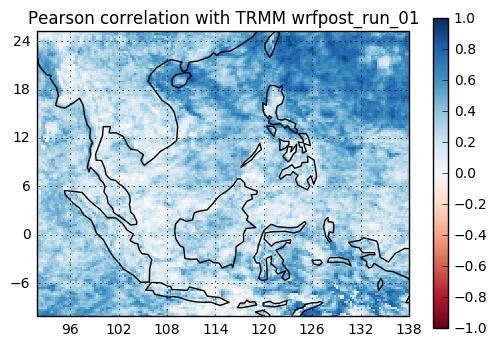

working on../WRF_Parameterization/wrfpost_run_26_2014_d01.nc ../WRF_Parameterization/wrfpost_run_13_2015_d01.nc


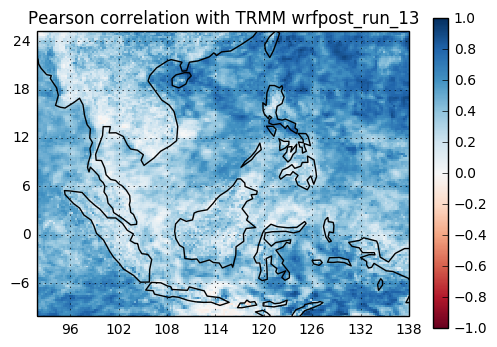

In [16]:
trmm15=xr.open_dataset('../WRF_Parameterization/TRMM_WRFPar2015_Regrid.nc')
trmm14=xr.open_dataset('../WRF_Parameterization/TRMM_WRFPar2014_Regrid.nc')
ti,la,lo=np.shape(trmm14.TRMM)
trmm=np.zeros([184,la,lo])
#collect JJA of both years
trmm[:92,:,:]=trmm14.TRMM[151:243,:,:]
trmm[92:,:,:]=trmm15.TRMM[151:243,:,:]
time,lats,lons=np.shape(trmm)
file_list2014=[]
file_list2015=[]
for name in glob.glob('../WRF_Parameterization/wrfpost_run*_2014_*.nc'):
    file_list2014.append(name)
for name in glob.glob('../WRF_Parameterization/wrfpost_run*_2015_*.nc'):
    file_list2015.append(name)
print(file_list2014,file_list2015)

#rearrange files by number
print('rearranging files')
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

file_list2014.sort(key=natural_keys)
file_list2015.sort(key=natural_keys)
print(file_list2014,file_list2015)

for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    gridlat=wrf2014.lat
    gridlon=wrf2014.lon
    ppt2014=wrf2014.PPT
    ppt2015=wrf2015.PPT
    ppt=np.zeros([time,lats,lons])
    ppt[:92,:,:]=ppt2014
    ppt[92:,:,:]=ppt2015
    correlation=np.zeros([lats,lons])
    for i in range(0,lats):
        for j in range(0,lons):
            correlation[i,j],b=stats.pearsonr(ppt[:,i,j],trmm[:,i,j])
    #np.save('correlation_'+str(file_list2015[fileIndex])[24:-12],correlation)
    ax=plt.subplot(projection=ccrs.PlateCarree())
    plt.pcolor(gridlon,gridlat,correlation,cmap='RdBu',vmin=-1,vmax=1)
    ax.coastlines()
    gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
    gl.xlabels_top=False
    gl.ylabels_right=False
    plt.title('Pearson correlation with TRMM '+str(file_list2015[fileIndex])[24:-12])
    plt.colorbar()
    plt.show()
    #plt.savefig('../WRF_Parameterization/ppt_combined_corr'+file_list2015[fileIndex][24:-12]+'.png')
    #plt.close()

Loads correlation values saved and compares it to TRMM data over land

In [3]:
corrlist=[]
landmask=wrf2014.LANDMASK[0,:,:]
for name in glob.glob('../WRF_Parameterization/trmm_correlations/correlation_trmm_run*.npy'):
    corrlist.append(name)
corrlist.sort(key=natural_keys)

corrMeanAll=[]
corrMeanLand=[]
for filename in corrlist:
    print(filename[-10:-4])
    corr=np.load(filename)
    mskcorr=corr*landmask.data
    overallMean=np.mean(np.mean(corr))
    overallMeanLand=mskcorr.sum()/(mskcorr != 0).sum()
    corrMeanAll.append(overallMean)
    corrMeanLand.append(overallMeanLand)
    print('Average correlation overall is '+ str(overallMean))
    print("Average correlation over land is "+ str(mskcorr.sum()/(mskcorr != 0).sum()))
    

run_01
Average correlation overall is 0.366266134818
Average correlation over land is 0.292789960299
run_02
Average correlation overall is 0.405686966111
Average correlation over land is 0.295531205946
run_03
Average correlation overall is 0.396536078763
Average correlation over land is 0.290821432067
run_04
Average correlation overall is 0.374854397086
Average correlation over land is 0.297223315328
run_05
Average correlation overall is 0.491091323957
Average correlation over land is 0.344245880427
run_06
Average correlation overall is 0.49290882068
Average correlation over land is 0.344368210811
run_07
Average correlation overall is 0.486162359814
Average correlation over land is 0.33339663914
run_08
Average correlation overall is 0.47425548725
Average correlation over land is 0.353790026036
run_09
Average correlation overall is 0.321241166565
Average correlation over land is 0.257744186955
run_10
Average correlation overall is 0.355319618022
Average correlation over land is 0.262065

In [4]:
print(type(corrMeanAll))
print(corrMeanAll)
corrMeanAll.insert(12,0)
corrMeanAll.insert(12,0)
corrMeanAll.insert(12,0)
print(corrMeanAll)
corrMeanLand.insert(12,0)
corrMeanLand.insert(12,0)
corrMeanLand.insert(12,0)

<class 'list'>
[0.36626613481759562, 0.40568696611064081, 0.39653607876341923, 0.37485439708598228, 0.49109132395666993, 0.49290882068004971, 0.48616235981420008, 0.47425548724959482, 0.32124116656505886, 0.35531961802166073, 0.3570485859309242, 0.34948926108510509, 0.45427735750338283]
[0.36626613481759562, 0.40568696611064081, 0.39653607876341923, 0.37485439708598228, 0.49109132395666993, 0.49290882068004971, 0.48616235981420008, 0.47425548724959482, 0.32124116656505886, 0.35531961802166073, 0.3570485859309242, 0.34948926108510509, 0, 0, 0, 0.45427735750338283]


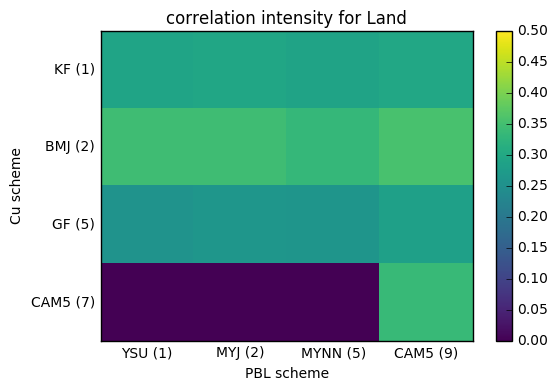

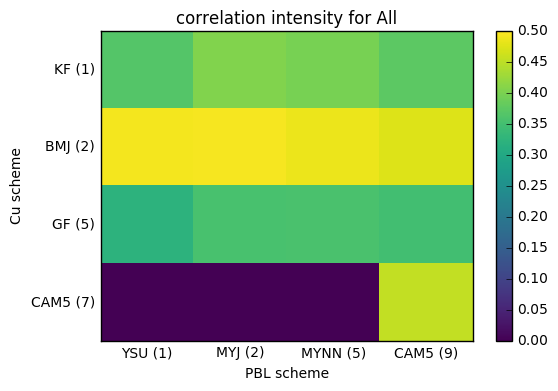

In [5]:
def compareMatrix():
    ax=plt.gca()
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.xaxis.set_minor_locator(ticker.FixedLocator(mx))
    ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['YSU (1)','MYJ (2)','MYNN (5)','CAM5 (9)']))
    plt.xlabel('PBL scheme')
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_minor_locator(ticker.FixedLocator(my))
    ax.yaxis.set_minor_formatter(ticker.FixedFormatter(['KF (1)','BMJ (2)','GF (5)','CAM5 (7)']))
    plt.ylabel('Cu scheme')
    plt.colorbar()
    plt.gca().invert_yaxis()

x=y=[0,1,2,3,4]
mx=my=[0.5,1.5,2.5,3.5]
labelx=['a','b','c','d']

landArray=np.array(corrMeanLand).reshape(4,4)
plt.figure(0)
plt.pcolormesh(y,x,landArray,cmap='viridis',vmin=0,vmax=0.5)
plt.title('correlation intensity for Land')
compareMatrix()

allArray=np.array(corrMeanAll).reshape(4,4)
plt.figure(1)
plt.pcolormesh(allArray,cmap='viridis',vmin=0,vmax=0.5)
plt.title('correlation intensity for All')
compareMatrix()

In [17]:
#calculate the bias
print(np.shape(ppt),np.shape(trmm))
bias=(ppt-trmm)
print(np.shape(bias),np.mean(bias),np.mean(bias**2))
print(np.sqrt(np.mean(bias**2)))

(184, 149, 189) (184, 149, 189)
(184, 149, 189) 1.15394614653 236.229085176
15.3697457746
